In [1]:
import tensorflow as tf
#from tensorflow import keras
import keras
from keras import layers
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import GridSearchCV

In [2]:
# We will use these later, best to import them up here.
import numpy as np
import sklearn
import pandas as pd

In [3]:
print(tf.__version__)
print(keras.__version__)

2.14.0
2.14.0


In [4]:
# Make sure to import pandas as pd somewhere in your file (we did this at the top)

# We can tell Pandas to read our CSV data file by giving it a file path.
training_data = pd.read_csv('./as1-bank-1.csv')
#training_data

In [5]:
from tensorflow import random
seed_value = 42
np.random.seed(seed_value)
random.set_seed(seed_value)

In [6]:
training_data.replace("yes", 1, inplace=True)
training_data.replace("no", 0, inplace=True)

Text(0.5, 1.0, 'Relationships between Customer Profile and Bank Service Subcription')

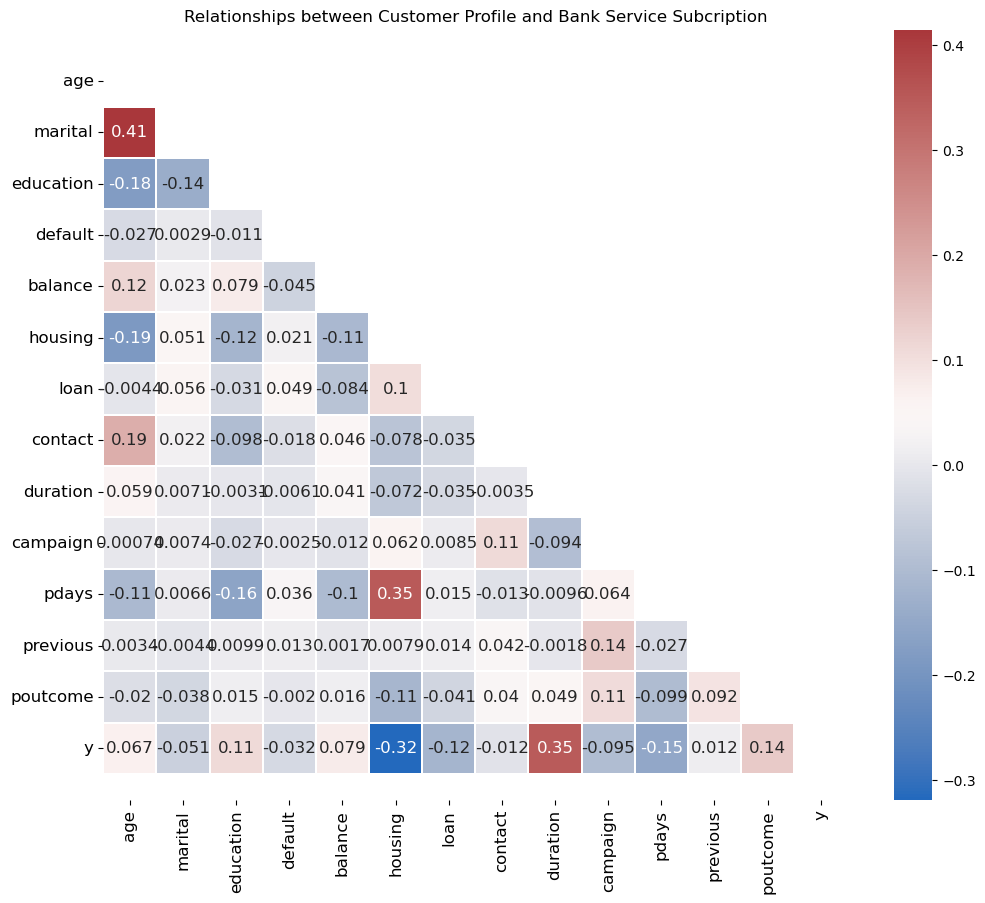

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = training_data.corr()
mask = np.triu(np.ones_like(training_data.corr())) 
ax = sns.heatmap(corr,annot=True,cmap="vlag",linewidths=0.1,annot_kws={'size':12}, mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relationships between Customer Profile and Bank Service Subcription')
#plt.show()

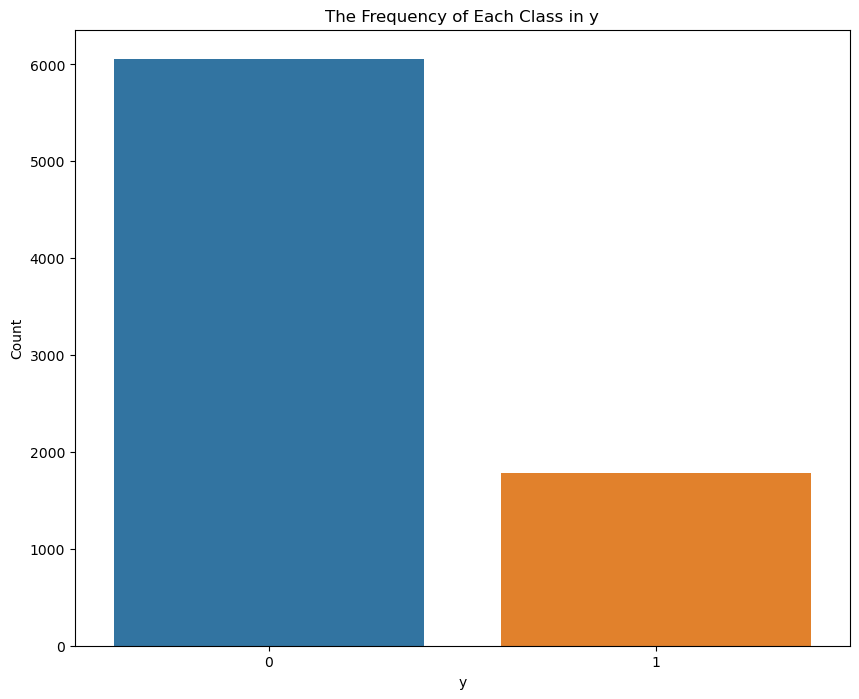

In [8]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
training_data['y'].value_counts()
sns.countplot(x='y', data=training_data)

plt.xlabel("y")
plt.ylabel("Count")
plt.title("The Frequency of Each Class in y")
plt.show()

In [9]:
# Grab the quality column, and then remove it from the main Dataframe.
training_y = training_data.pop('y')

training_x = training_data

In [10]:

#selected_features = ['age', 'marital', 'education', 'default' , 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays' ,'previous', 'poutcome']
selected_features = ['age', 'marital', 'education', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays' , 'poutcome']


training_x = training_x[selected_features]
#training_x

In [11]:
training_y

0       0
1       1
2       1
3       0
4       1
       ..
7837    0
7838    1
7839    1
7840    1
7841    0
Name: y, Length: 7842, dtype: int64

In [12]:
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [13]:
print(arr_train_x)

[[ 33   1   2 ...   1 151   0]
 [ 42   0   1 ...   1 166   2]
 [ 33   1   1 ...   1  91   0]
 ...
 [ 73   1   1 ...   1  40   0]
 [ 72   1   1 ...   5 184   1]
 [ 37   1   1 ...   2 188   2]]


In [14]:
print(arr_train_x.shape)
print(arr_train_y.shape)

(7842, 10)
(7842,)


In [15]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(arr_train_x)

In [16]:
from sklearn.model_selection import train_test_split

# Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_scaled, arr_train_y, test_size=0.3, random_state=seed_value)

print(X_train.shape)
print(X_test.shape)

(5489, 10)
(2353, 10)


In [17]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(10))) # 10 Columns of input

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation="sigmoid")) # 0->1 floating

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import SGD
# Compile the model.
model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

In [19]:
x_val = X_train[:1000] # Grab from 0 -> 1000
y_val = Y_train[:1000]

x_train_rest = X_train[1000:] # From 1000 -> end
y_train_rest = Y_train[1000:]

model_training_history = model.fit(
    x_train_rest,
    y_train_rest,
    epochs = 250,
    validation_data = (x_val, y_val)
)

Epoch 1/250
141/141 [==============================] - 1s 4ms/step - loss: 0.6220 - accuracy: 0.6469 - val_loss: 0.5111 - val_accuracy: 0.7700
Epoch 2/250
141/141 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7746 - val_loss: 0.4616 - val_accuracy: 0.7900
Epoch 3/250
141/141 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7908 - val_loss: 0.4435 - val_accuracy: 0.8040
Epoch 4/250
141/141 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7986 - val_loss: 0.4345 - val_accuracy: 0.8020
Epoch 5/250
141/141 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7993 - val_loss: 0.4299 - val_accuracy: 0.7980
Epoch 6/250
141/141 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8026 - val_loss: 0.4269 - val_accuracy: 0.7970
Epoch 7/250
141/141 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8031 - val_loss: 0.4256 - val_accuracy: 0.8010

Epoch 58/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8407 - val_loss: 0.3722 - val_accuracy: 0.8180
Epoch 59/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8403 - val_loss: 0.3715 - val_accuracy: 0.8190
Epoch 60/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8416 - val_loss: 0.3710 - val_accuracy: 0.8190
Epoch 61/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8412 - val_loss: 0.3710 - val_accuracy: 0.8170
Epoch 62/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8412 - val_loss: 0.3707 - val_accuracy: 0.8150
Epoch 63/250
141/141 [==============================] - 1s 4ms/step - loss: 0.3428 - accuracy: 0.8436 - val_loss: 0.3702 - val_accuracy: 0.8150
Epoch 64/250
141/141 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8425 - val_loss: 0.3698 - val_accuracy:

Epoch 115/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8510 - val_loss: 0.3642 - val_accuracy: 0.8310
Epoch 116/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8505 - val_loss: 0.3642 - val_accuracy: 0.8300
Epoch 117/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8499 - val_loss: 0.3639 - val_accuracy: 0.8320
Epoch 118/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8494 - val_loss: 0.3638 - val_accuracy: 0.8330
Epoch 119/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8505 - val_loss: 0.3640 - val_accuracy: 0.8300
Epoch 120/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8507 - val_loss: 0.3642 - val_accuracy: 0.8300
Epoch 121/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8503 - val_loss: 0.3641 - val_ac

141/141 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8519 - val_loss: 0.3626 - val_accuracy: 0.8300
Epoch 172/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8510 - val_loss: 0.3628 - val_accuracy: 0.8320
Epoch 173/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8516 - val_loss: 0.3626 - val_accuracy: 0.8300
Epoch 174/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8514 - val_loss: 0.3624 - val_accuracy: 0.8310
Epoch 175/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8499 - val_loss: 0.3624 - val_accuracy: 0.8310
Epoch 176/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8512 - val_loss: 0.3623 - val_accuracy: 0.8310
Epoch 177/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8519 - val_loss: 0.3625 - val_accuracy: 0.8320

141/141 [==============================] - 1s 4ms/step - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.3627 - val_accuracy: 0.8310
Epoch 228/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8539 - val_loss: 0.3626 - val_accuracy: 0.8320
Epoch 229/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8552 - val_loss: 0.3631 - val_accuracy: 0.8310
Epoch 230/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8545 - val_loss: 0.3628 - val_accuracy: 0.8340
Epoch 231/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8545 - val_loss: 0.3627 - val_accuracy: 0.8310
Epoch 232/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8556 - val_loss: 0.3624 - val_accuracy: 0.8290
Epoch 233/250
141/141 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8554 - val_loss: 0.3625 - val_accuracy: 0.8300

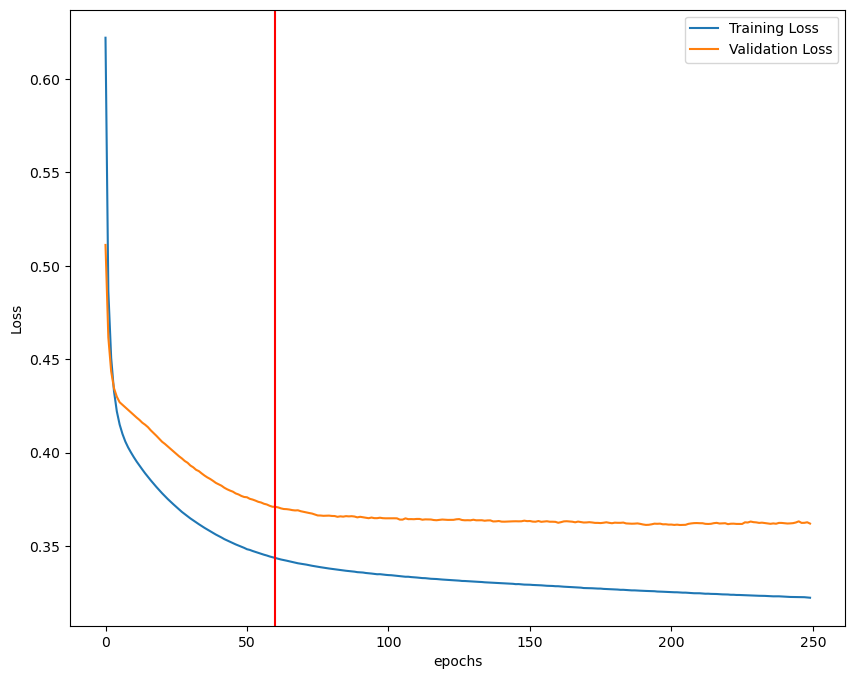

In [20]:
import matplotlib.pyplot as plt

# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')

# No subplots here, as we're just drawing over the same plot with multiple data.

# Loss and Val Loss metrics.
loss = model_training_history.history['loss']
val_loss = model_training_history.history['val_loss']


# Training loss, and Validation loss. Providing labels is useful for our legend later.
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
    
# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')

# Draw a red vertical line at x=60.
plt.axvline(x=60, color='red')

# Display a legend.
plt.legend()



model_training_history = model.fit(
    X_train,
    Y_train,
    batch_size = 50,
    epochs = 60,
)

print(model_training_history.history.keys())

Text(0.5, 0, 'epochs')

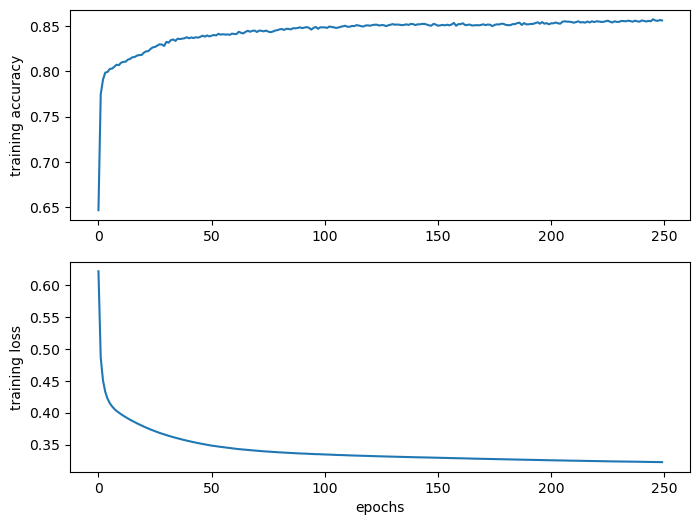

In [21]:
import matplotlib.pyplot as plt

# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')

# Set up a figure, and two handles for our 2 figures.
# Subplot can make many many plots within a single figure.
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Get our accuracy and loss metrics (these should be lists of numbers)
acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']

# We want accuracy on our first graph
ax1.plot(acc)
# Loss on our second
ax2.plot(loss)
    
# Give our figures some x and y axis labels.
ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')

# They both share an x axis, so we only need to define it on the bottom-most.
ax2.set_xlabel('epochs')

In [22]:
y_pred = model.predict(X_test)

74/74 [==============================] - 0s 2ms/step


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test, np.round(y_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

[[1681  130]
 [ 224  318]]
TP: 318
FP: 130
TN: 1681
FN: 224


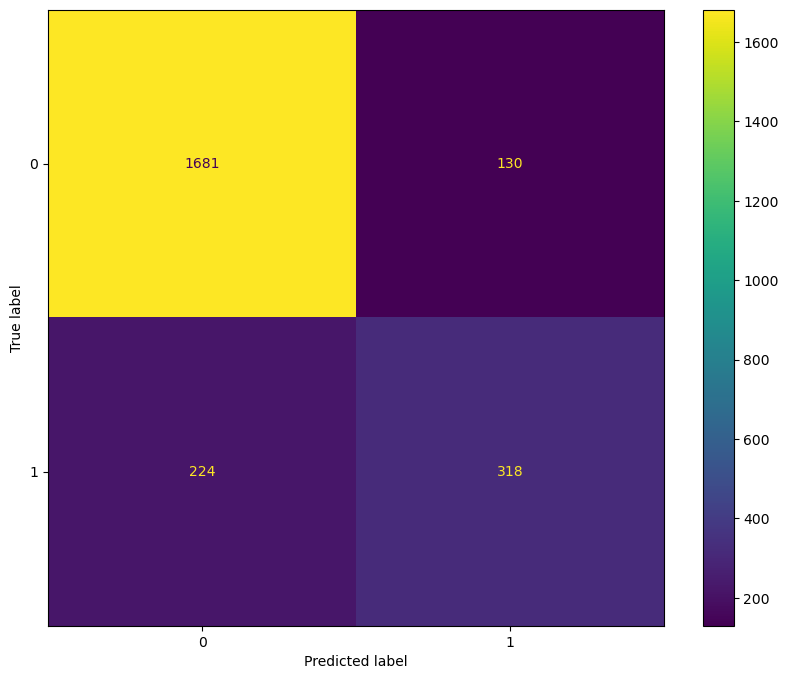

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
a  = ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))

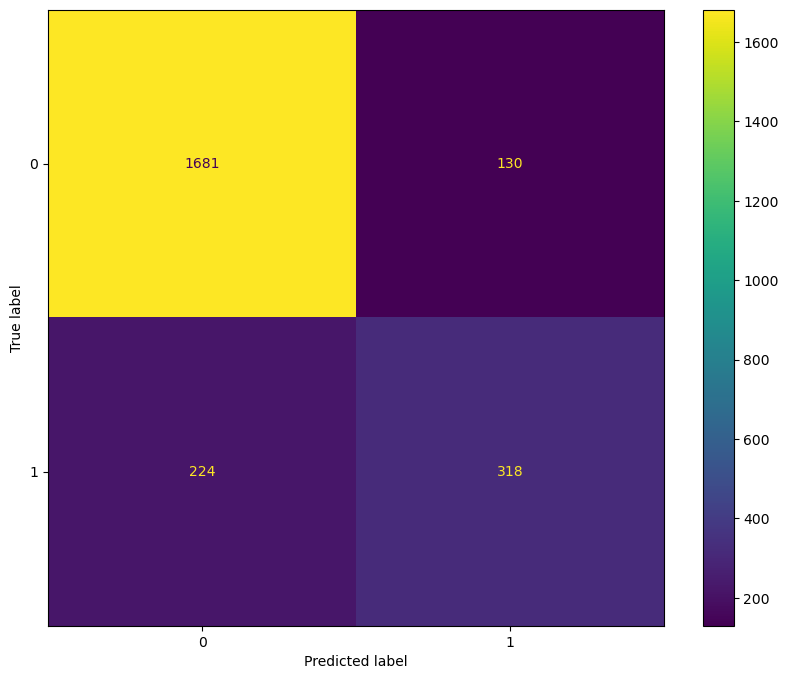

In [25]:
cm = confusion_matrix(Y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [26]:
from sklearn.metrics import classification_report

# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
# A 'kitchen sink' utility for gathering precision, recall, f-1, support, accuracy.
print(classification_report(Y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1811
           1       0.71      0.59      0.64       542

    accuracy                           0.85      2353
   macro avg       0.80      0.76      0.77      2353
weighted avg       0.84      0.85      0.84      2353

